In [2]:
#Хомюк Григорий Александрович БПМ-161
#Задание 2.4.5
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 

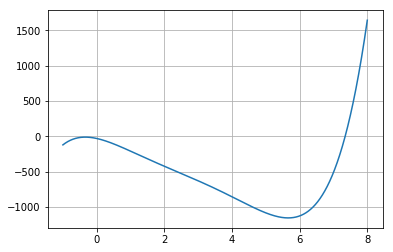

In [12]:
#локализуем корни
#построим график функции
x = np.arange(-1, 8, 0.001) #отрезок
y = x**5-13.0072*x**4+60.24546*x**3-122.0716*x**2-105.6798*x-30.19201 #заданная функция
plt.grid(True) #сетка
plt.plot(x, y)
plt.show()

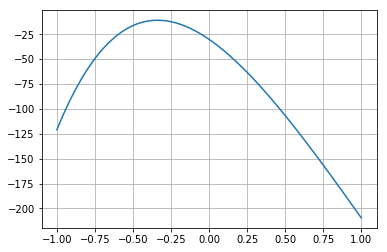

In [13]:
#на отрезке [-1,1] корней нет
x = np.arange(-1, 1, 0.001) #отрезок
y = x**5-13.0072*x**4+60.24546*x**3-122.0716*x**2-105.6798*x-30.19201 #заданная функция
plt.grid(True) #сетка
plt.plot(x, y)
plt.show()

In [17]:
func = lambda x: x**5-13.0072*x**4+60.24546*x**3-122.0716*x**2-105.6798*x-30.19201 #заданная функция 
#найдем решение уравнения
print(optimize.brentq(func, 7, 8))

7.344592358004011


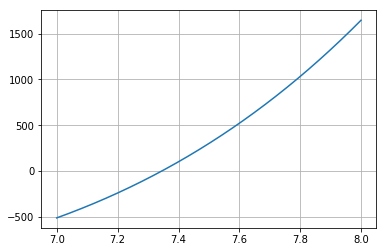

In [20]:
#отрезок локализации [7,8]
x = np.arange(7, 8, 0.001) #заданный отрезок
y = x**5-13.0072*x**4+60.24546*x**3-122.0716*x**2-105.6798*x-30.19201 #заданная функция
plt.grid(True) #сетка
plt.plot(x, y)
plt.show()

In [21]:
#функция для метода Ньютона, возвращает корень и шаг, на котором он получен
def newton(x0, func, df, tol): #начальное приближение, функция, ее производная, точность
    k = 0 #шаг
    while True:
        x1 = x0 - func(x0)/df(x0)
        k += 1
        if abs(x1 - x0) < tol:
            return x1, k
        x0 = x1

In [41]:
func = lambda x: x**5-13.0072*x**4+60.24546*x**3-122.0716*x**2-105.6798*x-30.19201 #заданная функция
df = lambda x: 5*x**4-4*13.0072*x**3+3*60.24546*x**2-2*122.0716*x-105.6798 #производная заданной функции
#ищем корень с помощью метода Ньютона
print(newton(7.3, func, df, 10**(-8))) #корень с точностью 10^(-8), вывод: корень, число шагов

(7.344592358004016, 4)


In [42]:
fi = lambda x, x0: x - func(x)/df(x0) #x-f(x)/f'(x0)
dfi = lambda x, x0: 1 - df(x)/df(x0) #производная fi
#функция для метода простой итерации
def itmethod(x0, fi, tol, q): #начальное приближение, функция ф, точность, q 
    k = 0
    xn1 = x0
    xn = fi(xn1, x0)
    while abs(xn - xn1) >= ((1-q)/q)*tol:
        xn1 = xn
        xn = fi(xn1, x0)
        k += 1
    return(xn, k)

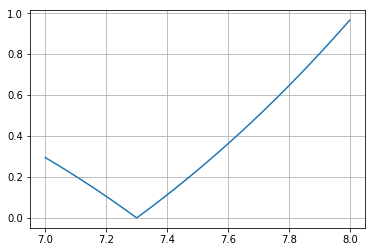

In [43]:
#ищем максимум производной
x = np.arange(7, 8, 0.001) #заданный отрезок
y = abs(dfi(x,7.3)) #производная заданной функции
plt.grid(True) #сетка
plt.plot(x, y)
plt.show()
#по графику видно, что максимум - справа 

In [44]:
#ищем q для критерия окончания - максимум модуля производной 
q=abs(dfi(7,8))
q

0.6415878561528839

In [45]:
#ищем корень с помощью метода простой итерации 
print(itmethod(7.3, fi, 10**(-8), q)) #корень с точностью 10^(-8), вывод: корень, число шагов

(7.344592358020115, 6)


In [36]:
#Метод Ньютона сходится быстрее, чем метод простой итерации (4 шага вместо 6)